## Image Classification With Pytouch

In [58]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import random

import torch
import torch.nn as nn
import torch.optim as optim
#import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split


In [29]:
with open('mnist.pkl', 'rb') as f:
    data = pickle.load(f)
    
images = data['images']
labels = data['labels']

In [49]:
## Define a Training/Testing Loop
def process_dataset(title, num_epochs, train_loader):
    print("*********************** ", title, " ************************")
    # Example training loop in PyTorch
    for epoch in range(num_epochs):
        total_loss = 0
        correct = 0
        total = 0
        for images, labels in train_loader:
            # Flatten the images (28x28 -> 784)
            images = images.view(-1, 784)
            
            # Forward pass
            outputs = model(images)
            
            # Compute loss
            loss = loss_fn(outputs, labels)
            
            # Backward pass and optimization
            optimizer.zero_grad()  # Zero the gradients before backpropagation
            loss.backward()        # Backpropagation
            optimizer.step()       # Update weights
            # Accumulate loss
            total_loss += loss.item()
    
            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)  # Get the index of the max log-probability (predicted class)
            total += labels.size(0)                    # Total number of labels
            correct += (predicted == labels).sum().item()  # Sum the correct predictions
    
        # Calculate average loss and accuracy for the epoch
        avg_loss = total_loss / len(train_loader)
        accuracy = 100 * correct / total
    
        # Print epoch statistics
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%')
        

In [30]:
print(images.shape)
images[1]

(10000, 28, 28)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [31]:
print(labels.shape)
labels[1]

(10000,)


0

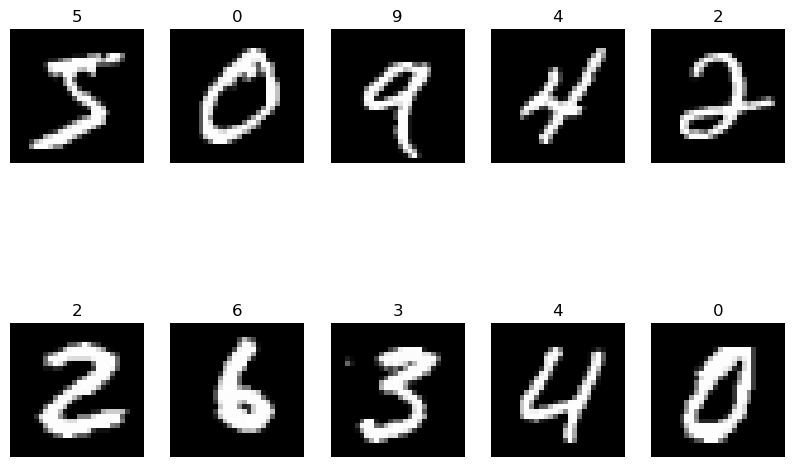

In [32]:
plt.figure(figsize=(10, 7))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i*i], cmap='gray')
    plt.title(labels[i*i])
    plt.axis('off')

### Convert Images to Pytouch Tensors

In [33]:
# Convert the images and labels to PyTorch tensors
images = torch.tensor(images, dtype=torch.float32)
labels = torch.tensor(labels, dtype=torch.long)

In [34]:
# Normalize the images
images = images / 255.0

In [35]:
# Create a dataset and data loader
dataset = TensorDataset(images, labels)

# Split the dataset into training and testing
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])


In [36]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [42]:
### Create the Model using torch.nn.Sequential
model = nn.Sequential(
    nn.Linear(784, 600),  # Input layer (784 features) and first hidden layer (600 units)
    nn.ReLU(),            # ReLU activation function
    nn.Linear(600, 10),   # Second layer with 10 output units (for 10 classes)
    nn.Softmax(dim=1)     # Softmax activation for multi-class classification
)

In [43]:
# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()  # PyTorch's cross-entropy loss includes softmax
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [51]:
process_dataset("ON TRAIN DATASET", 50, train_loader)

***********************  ON TRAIN DATASET  ************************
Epoch [1/50], Loss: 1.4784, Accuracy: 98.35%
Epoch [2/50], Loss: 1.4730, Accuracy: 98.91%
Epoch [3/50], Loss: 1.4716, Accuracy: 98.99%
Epoch [4/50], Loss: 1.4700, Accuracy: 99.11%
Epoch [5/50], Loss: 1.4698, Accuracy: 99.14%
Epoch [6/50], Loss: 1.4697, Accuracy: 99.14%
Epoch [7/50], Loss: 1.4695, Accuracy: 99.16%
Epoch [8/50], Loss: 1.4695, Accuracy: 99.16%
Epoch [9/50], Loss: 1.4695, Accuracy: 99.16%
Epoch [10/50], Loss: 1.4702, Accuracy: 99.11%
Epoch [11/50], Loss: 1.4718, Accuracy: 98.96%
Epoch [12/50], Loss: 1.4710, Accuracy: 99.06%
Epoch [13/50], Loss: 1.4709, Accuracy: 99.05%
Epoch [14/50], Loss: 1.4722, Accuracy: 98.99%
Epoch [15/50], Loss: 1.4697, Accuracy: 99.17%
Epoch [16/50], Loss: 1.4691, Accuracy: 99.20%
Epoch [17/50], Loss: 1.4687, Accuracy: 99.24%
Epoch [18/50], Loss: 1.4687, Accuracy: 99.24%
Epoch [19/50], Loss: 1.4686, Accuracy: 99.25%
Epoch [20/50], Loss: 1.4686, Accuracy: 99.25%
Epoch [21/50], Loss: 

In [52]:
# Testing The model
process_dataset("ON TEST DATASET", 25, test_loader)

***********************  ON TEST DATASET  ************************
Epoch [1/25], Loss: 1.4914, Accuracy: 97.15%
Epoch [2/25], Loss: 1.4875, Accuracy: 97.35%
Epoch [3/25], Loss: 1.4817, Accuracy: 98.00%
Epoch [4/25], Loss: 1.4788, Accuracy: 98.20%
Epoch [5/25], Loss: 1.4756, Accuracy: 98.55%
Epoch [6/25], Loss: 1.4742, Accuracy: 98.65%
Epoch [7/25], Loss: 1.4726, Accuracy: 98.80%
Epoch [8/25], Loss: 1.4712, Accuracy: 98.95%
Epoch [9/25], Loss: 1.4706, Accuracy: 99.05%
Epoch [10/25], Loss: 1.4699, Accuracy: 99.10%
Epoch [11/25], Loss: 1.4698, Accuracy: 99.10%
Epoch [12/25], Loss: 1.4694, Accuracy: 99.15%
Epoch [13/25], Loss: 1.4694, Accuracy: 99.15%
Epoch [14/25], Loss: 1.4694, Accuracy: 99.15%
Epoch [15/25], Loss: 1.4694, Accuracy: 99.15%
Epoch [16/25], Loss: 1.4694, Accuracy: 99.15%
Epoch [17/25], Loss: 1.4694, Accuracy: 99.15%
Epoch [18/25], Loss: 1.4694, Accuracy: 99.15%
Epoch [19/25], Loss: 1.4694, Accuracy: 99.15%
Epoch [20/25], Loss: 1.4694, Accuracy: 99.15%
Epoch [21/25], Loss: 1

In [55]:
model.eval()

Sequential(
  (0): Linear(in_features=784, out_features=600, bias=True)
  (1): ReLU()
  (2): Linear(in_features=600, out_features=10, bias=True)
  (3): Softmax(dim=1)
)

In [59]:
## Using  the Model to Predict

def predict(dataset, index):
    
    # Get the image and label from the dataset
    image, label = dataset[index]
    # Flatten the image (28x28 to 784)
    image_flat = image.view(-1, 784)
    
    with torch.no_grad():  # Disable gradient computation
        output = model(image_flat)
    
    # Get the predicted class (output is a probability distribution, so we use argmax)
    _, predicted_class = torch.max(output.data, 1)
    
    # Plot the image
    plt.imshow(image.squeeze(), cmap='gray')  # Squeeze to remove the extra dimensions for visualization
    plt.title(f'Predicted: {predicted_class.item()}, Actual: {label}')
    plt.show()

6106


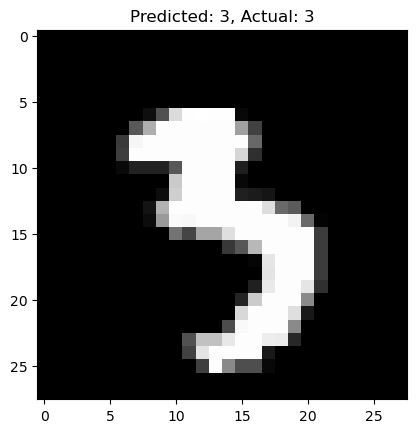

1737


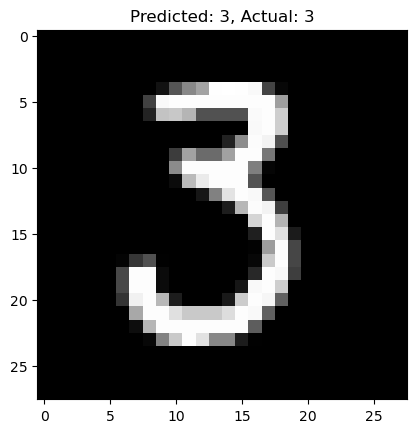

6904


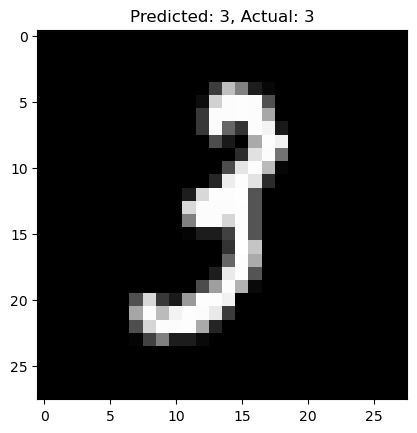

468


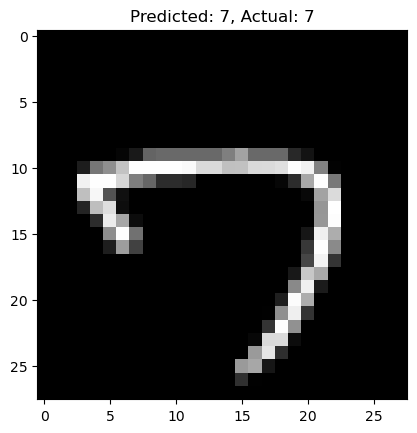

5828


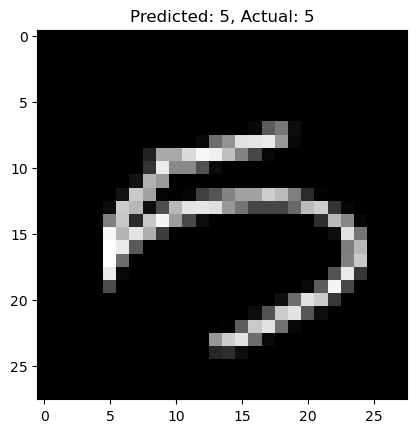

In [63]:
for i in range(5):
    index = random.randint(0, len(dataset))
    print(index)
    predict(dataset, index)
    